### Obtaining the movie review dataset

a. Download from http://ai.stanford.edu/~amaas/data/sentiment/

b. Extract using Python's tarfile module

In [2]:
import tarfile
# The path here is where the compressed movie dataset is downloaded
with tarfile.open(r"C:\Users\Admin\Downloads\aclImdb_v1.tar.gz", 'r:gz') as movie_dataset:
    movie_dataset.extractall()

c. Preprocess the extracted dataset into a better format

In [3]:
# Import needed libraries
import pyprind 
import pandas as pd
import os
import sys

# Extracted data in the root folder of this notebook
data_path = "aclImdb"

# Class labelling 1 - positive, 0 - negative
labels = {'pos': 1, 'neg': 0}
progress_bar = pyprind.ProgBar(5000, stream = sys.stdout)
data_frame = pd.DataFrame()

# Look into both the test and train sub folders
for i in ('test', 'train'):
    for j in ('pos', 'neg'):
        path = os.path.join(data_path, i, j)
        for file in sorted(os.listdir(path)):
            with open(os.path.join(path, file), 'r', encoding='utf-8') as infile:
                text = infile.read()
            
            data_frame = data_frame.append([[text, labels[j]]], ignore_index = True)
            
            progress_bar.update()
            
data_frame.columns = ['review', 'sentiment']

C:\Users\Admin\AppData\Local\Temp\ipykernel_22504\4275360060.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append([[text, labels[j]]], ignore_index = True)


d. Save newly-shuffled and assembled movie review dataset as a CSV file

In [4]:
import numpy as np
np.random.seed(0)
data_frame = data_frame.reindex(np.random.permutation(data_frame.index))

# Save into a directory
data_frame.to_csv('data/movie_data.csv', index = False, encoding='utf-8')

e. Check the saved data and do sanity check

In [5]:
# Read the data
prepared_data = pd.read_csv('data/movie_data.csv', encoding='utf-8')

# Column renaming
prepared_data = prepared_data.rename(columns = {"0": "review", "1": "sentiment"})

# Show first five rows
prepared_data.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [6]:
# Sanity check
prepared_data.shape

(50000, 2)

In [7]:
#Check if there are missing values in the data
prepared_data.isnull().sum()

review       0
sentiment    0
dtype: int64

Text(0, 0.5, 'count')

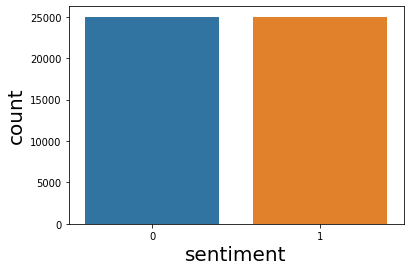

In [9]:
#Create a chart to check the class label distribution
import seaborn as sns
chart = sns.countplot(x='sentiment', data=prepared_data)
chart.set_xlabel("sentiment", fontsize = 20)
chart.set_ylabel("count", fontsize = 20)